# Árvores II - Tarefa I

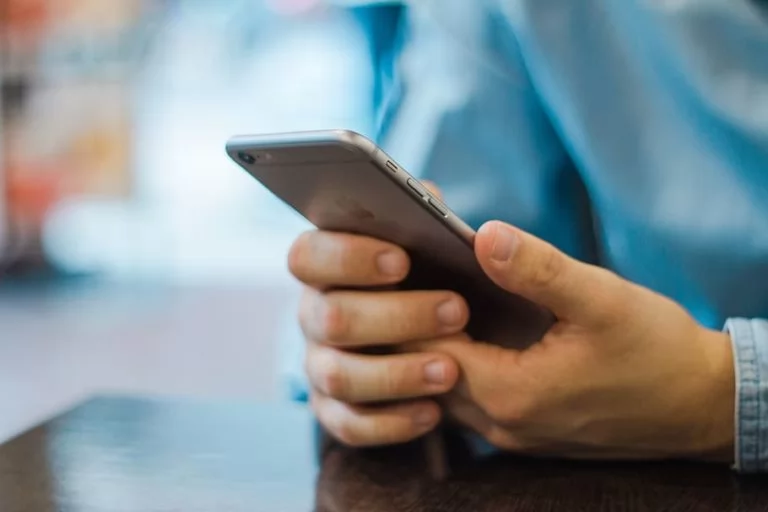  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

### 1.1 Carregamento dos pacotes necessários
Os pacotes necessários para esta tarefa são:
- Pandas para leitura e modificação dos dados;
- Numpy que permite operações matemáticas;
- Matplotlib.pyplot para a geração de gráficos;
- Graphviz para visualizar as árvores de classificação criadas;
- Função DecisionTreeClassifier do sklearn.tree para a aplicação das árvores de classificação;
- Função export_graphviz para submeter os dados da árvore ao pacote graphviz;
- Funções confusion_matrix e ConfusionMatrixDisplay do pacote sklearn.metrics para ajuste e visualização da matriz de confusão do ajuste final da árvore de classificação.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

### 1.2 Carregando as bases necessárias

Nesta seção, vamos obter os dados em questão através dos arquivos txt fornecidos.

### 1. 2.1 feature.txt

In [4]:
# Leitura dos dados no arquivo features.txt
features = pd.read_csv('./UCI HAR Dataset/features.txt',
                       header=None, sep=' ', usecols=[1],
                       names=[''])

# Visualização do dataframe features
features

,
0,tBodyAcc-mean()-X
1,tBodyAcc-mean()-Y
2,tBodyAcc-mean()-Z
3,tBodyAcc-std()-X
4,tBodyAcc-std()-Y
...,...
556,"angle(tBodyGyroMean,gravityMean)"
557,"angle(tBodyGyroJerkMean,gravityMean)"
558,"angle(X,gravityMean)"
559,"angle(Y,gravityMean)"


### 1.2.2 subject_train.txt

In [5]:
# Leitura dos dados no arquivo subject_train.txt
subject_train = pd.read_csv('./UCI HAR Dataset/train/subject_train.txt',
                              header=None, names=['subject_train'])

# Visualização do dataframe subject_train
subject_train

,subject_train
0,1
1,1
2,1
3,1
4,1
...,...
7347,30
7348,30
7349,30
7350,30


### 1.2.3 X_train.txt

In [6]:
# Lê o arquivo X_train.txt
X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt',
                       header=None, delim_whitespace=True)

# Define as colunas do dataframe X_train como linhas do dataframe features
X_train.columns = features['']

# Adiciona a coluna 'subject train' com os valores sendo as linhas do dataframe subject_train
X_train['subject train'] = subject_train

# Cria uma coluna índice para o dataframe
X_train['index'] = [i for i in range(len(X_train))]

# Define um índice duplo com o criado e a coluna 'subject train'
X_train = X_train.set_index(['index','subject train'])

# Visualiza as 10 primeiras linhas do dataframe resultante
X_train.head(10)

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
index,subject train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
5,1,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
6,1,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,0.145844,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010
7,1,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,0.136382,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976
8,1,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.314038,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364


### 1.2.4 subject_test.txt

In [7]:
# Leitura dos dados no arquivo subject_test.txt
subject_test = pd.read_csv('./UCI HAR Dataset/test/subject_test.txt',
                              header=None, names=['subject_test'])

# Visualização do dataframe subject_test
subject_test

,subject_test
0,2
1,2
2,2
3,2
4,2
...,...
2942,24
2943,24
2944,24
2945,24


### 1.2.5  X_test.txt

In [8]:
# Lê o arquivo X_test.txt
X_test = pd.read_csv('./UCI HAR Dataset/test/X_test.txt',
                       header=None, delim_whitespace=True)

# Define as colunas do dataframe X_test como linhas do dataframe features
X_test.columns = features['']

# Adiciona a coluna 'subject test' com os valores sendo as linhas do dataframe subject_test
X_test['subject test'] = subject_test

# Cria uma coluna índice para o dataframe
X_test['index'] = [i for i in range(len(X_test))]

# Define um índice duplo com o criado e a coluna 'subject test'
X_test = X_test.set_index(['index','subject test'])

# Visualiza as 10 primeiras linhas do dataframe resultante
X_test.head(10)

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
index,subject test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
5,2,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,0.083603,-0.493517,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471
6,2,0.279746,-0.018271,-0.104000,-0.995819,-0.976354,-0.977725,-0.995996,-0.973665,-0.979253,-0.937856,...,0.272339,-0.093855,-0.391286,-0.309083,-0.000857,0.728514,-0.333771,-0.690085,0.295282,-0.067065
7,2,0.274601,-0.025035,-0.116831,-0.995594,-0.982069,-0.985262,-0.995341,-0.981485,-0.984610,-0.941263,...,0.213799,-0.338123,-0.672358,-0.025526,-0.214033,0.437640,-0.366674,-0.688785,0.295981,-0.067706
8,2,0.272529,-0.020954,-0.114472,-0.996784,-0.975906,-0.986597,-0.997029,-0.973735,-0.985556,-0.941263,...,0.283428,-0.629599,-0.853248,0.144626,-0.035564,-0.181800,0.087320,-0.685390,0.299394,-0.065491


### 1.3 Salvando X_test e X_train em csv
Agora que foram criadas as bases de treino e teste, vamos salvá-las em arquivos csv para utilizações posteriores.

In [9]:
# Salva a base X_train no formato csv dentro da pasta em que se encontra este código
X_train.to_csv('X_train.csv')

# Salva a base X_test no formato csv dentro da pasta em que se encontra este código
X_test.to_csv('X_test.csv')

### 1.4 Selecionando apenas as 3 primeiras colunas de cada base
Uma vez que nesta tarefa vamos trabalhar apenas com as 3 primeiras colunas das bases, vamos criar novas bases selecionando apenas tais colunas.

In [10]:
# Seja X_treino o dataframe com as 3 primeiras colunas da base X_train
X_treino = X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

# Visualizando X_treino
X_treino

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z
index,subject train,,,
0,1,0.288585,-0.020294,-0.132905
1,1,0.278419,-0.016411,-0.123520
2,1,0.279653,-0.019467,-0.113462
3,1,0.279174,-0.026201,-0.123283
4,1,0.276629,-0.016570,-0.115362
...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233
7348,30,0.273853,-0.007749,-0.147468
7349,30,0.273387,-0.017011,-0.045022


In [11]:
# Seja X_teste o dataframe com as 3 primeiras colunas da base X_test
X_teste = X_test[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

# Visualizando X_teste
X_teste

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z
index,subject test,,,
0,2,0.257178,-0.023285,-0.014654
1,2,0.286027,-0.013163,-0.119083
2,2,0.275485,-0.026050,-0.118152
3,2,0.270298,-0.032614,-0.117520
4,2,0.274833,-0.027848,-0.129527
...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109
2943,24,0.363385,-0.039214,-0.105915
2944,24,0.349966,0.030077,-0.115788


### 1.5 Carregando os arquivos y_train.txt e y_test.txt

In [12]:
# Leitura dos dados no arquivo y_train.txt
y_treino = pd.read_csv('./UCI HAR Dataset/train/y_train.txt',
                       header=None, sep=' ',squeeze=True)

# Visualizando y_treino
y_treino

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: 0, Length: 7352, dtype: int64

In [13]:
# Leitura dos dados no arquivo y_test.txt
y_teste = pd.read_csv('./UCI HAR Dataset/test/y_test.txt',
                       header=None, sep=' ',squeeze=True)

# Visualizando y_teste
y_teste

0       5
1       5
2       5
3       5
4       5
       ..
2942    2
2943    2
2944    2
2945    2
2946    2
Name: 0, Length: 2947, dtype: int64

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

### 2.1 Criando a árvore

In [14]:
%%time
# Cria uma árvore de classificação onde o número mínimo de observações por folha é 20
clf0 = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)

# Ajusta os dados da base de treino à árvore criada
arvore_inicial = clf0.fit(X_treino, y_treino)

Wall time: 30 ms


A árvore foi ajustada à base de treino, vamos visualizá-la.

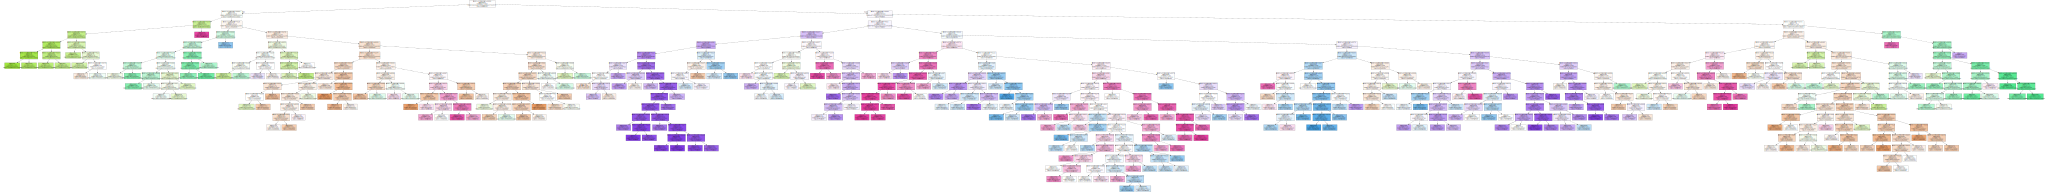

In [15]:
# Lista com os nomes das atividades na variável resposta
classes = ['Andando', 'Subindo escadas', 'Descendo escadas',
           'Sentando', 'Parado', 'Deitando']

# Ajusta os dados da árvore ao graphviz
dot_data = export_graphviz(arvore_inicial, out_file=None, 
                           feature_names=X_treino.columns,
                           class_names=classes,
                           filled=True)

# Monta o gráfico da árvore de classificação
graph = graphviz.Source(dot_data, format="png")

# Visualização da árvore
graph

A árvore foi desenvolvida com os requisitos em questão. Por via das dúvidas, vamos confirmar que a base utilizada possui apenas as 3 primeiras colunas.

In [16]:
# Visualizando a base X_treino
X_treino

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z
index,subject train,,,
0,1,0.288585,-0.020294,-0.132905
1,1,0.278419,-0.016411,-0.123520
2,1,0.279653,-0.019467,-0.113462
3,1,0.279174,-0.026201,-0.123283
4,1,0.276629,-0.016570,-0.115362
...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233
7348,30,0.273853,-0.007749,-0.147468
7349,30,0.273387,-0.017011,-0.045022


Foi confirmado que apenas as 3 primeiras colunas da base de treino foi utilizada. Agora, tomemos os ccp_alphas e as impurezas da árvore inicial.

### 2.2 Cálculo e filtragem dos ccp_alphas

In [17]:
%%time

# Ajusta a base de treino à árvore criada e calcula seu caminho custo de complexidade 
path = clf0.cost_complexity_pruning_path(X_treino, y_treino)

# Obtém os ccp_alphas e impurezas da árvore através do caminho custo de complexidade
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Wall time: 38.9 ms


Tendo obtido os ccp_alphas, vamos filtrá-los, de forma que fiquem apenas valores únicos positivos.

In [18]:
%%time

# Lista onde são armazenados os valores únicos de ccp_alphas > 0  
ccp_alphas_filtrado = []

# Inserindo na lista os ccp_alphas em questão
for alpha in ccp_alphas:
    if alpha > 0 and alpha not in ccp_alphas_filtrado:
        ccp_alphas_filtrado.append(alpha)

# Visualizando a lista
ccp_alphas_filtrado

Wall time: 0 ns


[6.966745401948242e-06,
 1.1276657087321029e-05,
 2.0255406544851008e-05,
 2.7203482045701916e-05,
 2.849888595264009e-05,
 4.633972458819549e-05,
 5.3500455226294756e-05,
 5.8440113641952934e-05,
 6.178080171551385e-05,
 6.598661121074139e-05,
 6.737688882742601e-05,
 7.028510488286564e-05,
 7.741681450384227e-05,
 7.995855510849019e-05,
 8.01474017245638e-05,
 8.282224835774233e-05,
 8.293424392620628e-05,
 8.496671989599103e-05,
 9.214745108744463e-05,
 9.635986956873458e-05,
 0.00010295301538434248,
 0.00010428001450852329,
 0.00010572262340488754,
 0.00010621112588831121,
 0.00011010933208974519,
 0.0001205803606040784,
 0.00012418671998269768,
 0.00013205365672453286,
 0.00013523397661567398,
 0.00013601741022850914,
 0.00014196313819217314,
 0.00014635162716725852,
 0.00014735219441421726,
 0.00014924416590987762,
 0.0001494927703823909,
 0.0001504827538559867,
 0.00015196814637990531,
 0.00015571346097719568,
 0.0001605115464890722,
 0.00016062899036919714,
 0.00016423914711831

### 2.3 Seleção dos ccp_alphas para os ajustes

In [19]:
%%time

# Define quais ccp_alphas vão ser utilizados nos ajustes 
ccp_alphas_selecionados = ccp_alphas_filtrado[::1]

# Visualização da lista de ccp_alphas
ccp_alphas_selecionados

Wall time: 0 ns


[6.966745401948242e-06,
 1.1276657087321029e-05,
 2.0255406544851008e-05,
 2.7203482045701916e-05,
 2.849888595264009e-05,
 4.633972458819549e-05,
 5.3500455226294756e-05,
 5.8440113641952934e-05,
 6.178080171551385e-05,
 6.598661121074139e-05,
 6.737688882742601e-05,
 7.028510488286564e-05,
 7.741681450384227e-05,
 7.995855510849019e-05,
 8.01474017245638e-05,
 8.282224835774233e-05,
 8.293424392620628e-05,
 8.496671989599103e-05,
 9.214745108744463e-05,
 9.635986956873458e-05,
 0.00010295301538434248,
 0.00010428001450852329,
 0.00010572262340488754,
 0.00010621112588831121,
 0.00011010933208974519,
 0.0001205803606040784,
 0.00012418671998269768,
 0.00013205365672453286,
 0.00013523397661567398,
 0.00013601741022850914,
 0.00014196313819217314,
 0.00014635162716725852,
 0.00014735219441421726,
 0.00014924416590987762,
 0.0001494927703823909,
 0.0001504827538559867,
 0.00015196814637990531,
 0.00015571346097719568,
 0.0001605115464890722,
 0.00016062899036919714,
 0.00016423914711831

No caso foram utilizados todos os ccp_alphas obtidos, uma vez que o tempo total de ajustes foi mais baixo do que esperado, tal como será visto na próxima seção. Lembrando que quanto maior a quantidade de ccp_alphas, maior a acurácia da árvore final depois da pós poda.

### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

### 3.1 Ajuste das árvores para cada ccp_alpha

In [20]:
%%time

# Lista onde são inseridas as árvores
clfs0 = []

# Realiza o ajuste da base de treino à árvore para cada ccp_alpha
for ccp_alpha in ccp_alphas_selecionados:
    clf0 = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_treino, y_treino)
    clfs0.append(clf0)

Wall time: 14.9 s


### 3.2 Cálculo da acurácia de cada árvore nas bases de treino e teste

In [21]:
# Cálculos da acurácia de cada árvore na base de treino, salvando os resultados em uma lista
acuracia_treino = [clf0.score(X_treino, y_treino) for clf0 in clfs0]

# Cálculos da acurácia de cada árvore na base de teste, salvando os resultados em uma lista
acuracia_teste  = [clf0.score(X_teste, y_teste)   for clf0 in clfs0]

### 3.3 Gráfico da acurácia em função do ccp_alpha

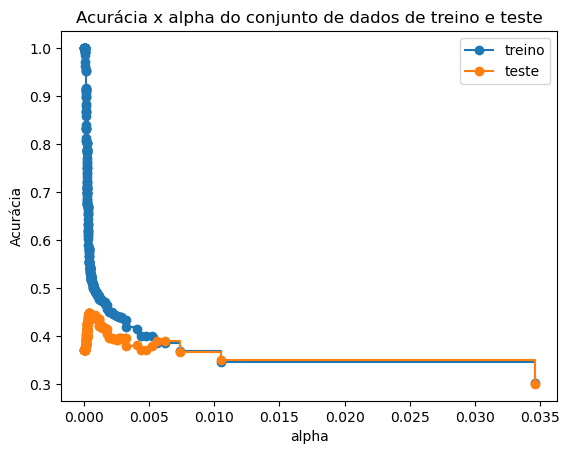

In [22]:
# Cria a figura em que é inserido o gráfico
fig, ax = plt.subplots()

# Define o nome do eixo x
ax.set_xlabel("alpha")

# Define o nome do eixo y
ax.set_ylabel("Acurácia")

# Título do gráfico
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")

# Gráfico da acurácia na base de treino em função do ccp_alpha
ax.plot(ccp_alphas_selecionados, acuracia_treino, marker='o', label="treino",
        drawstyle="steps-post")

# Gráfico da acurácia na base de teste em função do ccp_alpha
ax.plot(ccp_alphas_selecionados, acuracia_teste, marker='o', label="teste",
        drawstyle="steps-post")

# Insere os nomes em cada eixo
ax.legend()

# Mostra o gráfico
plt.show()

### 3.4 Seleção da árvore com melhor acurácia na base de teste

In [23]:
# Obtém o índice da árvore com melhor acurácia na lista de ajustes da base de teste
ind_melhor_arvore = len(acuracia_teste) - acuracia_teste[::-1].index(max(acuracia_teste)) - 1

# Seleciona a árvore com o índice obtido
melhor_arvore = clfs0[ind_melhor_arvore]

# Mostra qual árvore foi selecionada
melhor_arvore

DecisionTreeClassifier(ccp_alpha=0.00036355986671961156, random_state=2360873)

### 3.5 Melhor acurácia com as 3 variáveis

In [24]:
# Obtém a acurácia da árvore com melhor ajuste na base de teste
acuracia = melhor_arvore.score(X_teste, y_teste)

print(f'A acurácia da árvore com melhor acurácia na base de teste é: {acuracia:.2f}')

A acurácia da árvore com melhor acurácia na base de teste é: 0.45


Para uma melhor avaliação do resultado, vejamos a matriz de confusão do ajuste.

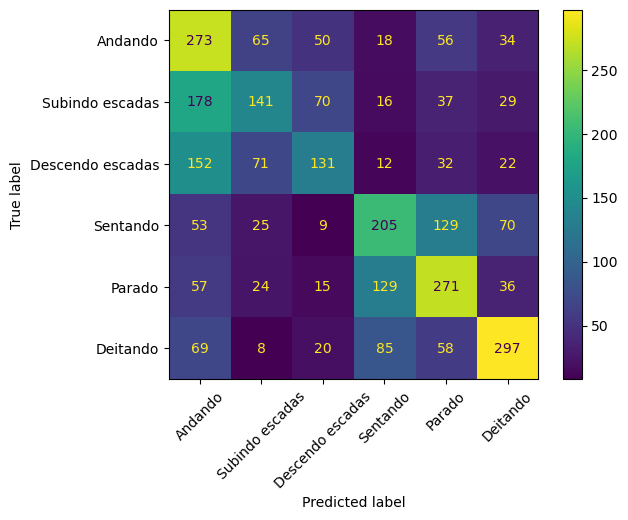

In [25]:
# Lista com os nomes das atividades na variável resposta
classes = ['Andando', 'Subindo escadas', 'Descendo escadas',
           'Sentando', 'Parado', 'Deitando']

# Predições da variável resposta a partir da base de teste
predicoes = melhor_arvore.predict(X_teste)

# Comparação entre os valores verdadeiros e os preditos na base de teste
matriz = confusion_matrix(y_teste, predicoes)

# Ajuste dos dados à matriz de confusão
display = ConfusionMatrixDisplay(confusion_matrix=matriz,
                              display_labels=classes)

# Montagem gráfica ad matriz de confusão
display.plot()

# Rotaciona os nomes no eixo x por 45 graus
plt.xticks(rotation=45)

# Visualização da matriz de confusão
plt.show()

Os resultados mostraram que a acurácia do ajuste da árvore às 3 variáveis da base de treino foi de apenas 0.45, resultando em predições diferentes dos atividades verdadeiras. Isto é bem visualizado na matriz de confusão, onde a atividade predita era andando, quando a pessoa estava subindo ou descendo escadas na verdade.